In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("food_coded.csv")

In [ ]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


Looking the dataset here, it seems like a survey among the people regarding their dietary, health and living conditions.

In [ ]:
df.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [ ]:
df.shape

(125, 61)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          124 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [ ]:
df['GPA'].unique()

array(['2.4', '3.654', '3.3', '3.2', '3.5', '2.25', '3.8', '3.904', '3.4',
       '3.6', '3.1', nan, '4', '2.2', '3.87', '3.7', '3.9', '2.8', '3',
       '3.65', '3.89', '2.9', '3.605', '3.83', '3.292', '3.35',
       'Personal ', '2.6', '3.67', '3.73', '3.79 bitch', '2.71', '3.68',
       '3.75', '3.92', 'Unknown', '3.77', '3.63', '3.882'], dtype=object)

As its a column for GPA score, dtype float should be preffered here. Looking the values in this column, we encounter some missing values and some unwanted statements, we need to clean it.

In [ ]:
df['GPA'] = df['GPA'].str.replace('bitch', '')

In [ ]:

# Convert the column to float
df['GPA'] = pd.to_numeric(df['GPA'], errors='coerce', downcast='float')


Replacing the missing values in GPA column with the mean value

In [ ]:
# Calculate the mean of non-NaN values
mean_gpa = df['GPA'].mean()

# Replace NaN values with the mean
df['GPA'].fillna(mean_gpa, inplace=True)

Similarly checking for values in each column to get an overview.

In [ ]:
df.Gender.unique # 1- male 2-female

<bound method Series.unique of 0      2
1      1
2      1
3      1
4      1
      ..
120    1
121    1
122    1
123    2
124    1
Name: Gender, Length: 125, dtype: int64>

In [ ]:
df.calories_day.unique()

array([nan,  3.,  4.,  2.])

In [ ]:
df.calories_scone.unique()

array([315., 420., 980.,  nan])

In [ ]:
df.weight.unique()

array(['187', '155', "I'm not answering this. ", 'Not sure, 240', '190',
       '180', '137', '125', '116', '110', '264', '123', '185', '145',
       '170', '135', '165', '175', '195', '105', '160', '167', '115',
       '205', nan, '128', '150', '140', '120', '100', '113', '168', '169',
       '200', '265', '192', '118', '210', '112', '144 lbs', '130', '127',
       '129', '260', '184', '230', '138', '156'], dtype=object)

In [ ]:
df.tortilla_calories.unique()

array([1165.,  725.,  940.,  580.,   nan])

In [ ]:
df.sports.unique()

array([ 1.,  2., nan])

In [ ]:
df.soup.unique()

array([ 1.,  2., nan])

In [ ]:
df.self_perception_weight.unique()

array([ 3.,  6.,  5.,  4.,  1.,  2., nan])

In [ ]:
df.soup.unique() # 1- they drink soup , 2 - they  don't drink it

array([ 1.,  2., nan])

In [ ]:
df.persian_food.unique() #  ratings given for the persian food on the scale of 1-5.

array([ 5.,  4.,  2.,  1.,  3., nan])

In [ ]:
df.on_off_campus.unique()  #  1: 'on campus',2: 'Rent out of campus', 3: 'Live with my parents and commute',4: 'Own my own house'

array([ 1.,  2.,  3.,  4., nan])

In [ ]:

# Replace missing values with the mode
df['calories_day'].fillna(1.0, inplace=True)


Here as its a response to a survey, so replacing the missing values with the mode can be better.

In [ ]:
df['weight'] = df['weight'].str.replace('Not sure,', '').str.replace('lbs', '')
# Convert the column to float
df['weight'] = pd.to_numeric(df['weight'], errors='coerce', downcast='float')

In [ ]:
# Calculate the mean of non-NaN values
mean_wt = df['weight'].mean()
# Replace NaN values with the mean
df['weight'].fillna(mean_wt, inplace=True)

In [ ]:
# Assuming 'df' is your DataFrame and 'calories_scone' is the column you want to handle
mode_spwt = df['self_perception_weight'].mode().iloc[0]
# Replace missing values with the mode
df['self_perception_weight'].fillna(mode_spwt, inplace=True)

In [ ]:
# Assuming 'df' is your DataFrame and 'calories_scone' is the column you want to handle
mode_campus= df['on_off_campus'].mode().iloc[0]
# Replace missing values with the mode
df['on_off_campus'].fillna(mode_campus, inplace=True)

In [ ]:
# Assuming 'df' is your DataFrame and 'column_name' is the column you want to handle
mode_campus= df['life_rewarding'].mode().iloc[0]
# Replace missing values with the mode
df['life_rewarding'].fillna(mode_campus, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           125 non-null    float32
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          124 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

Now we can see that most of our essential data that we will be using is now cleaned and of right datatype.

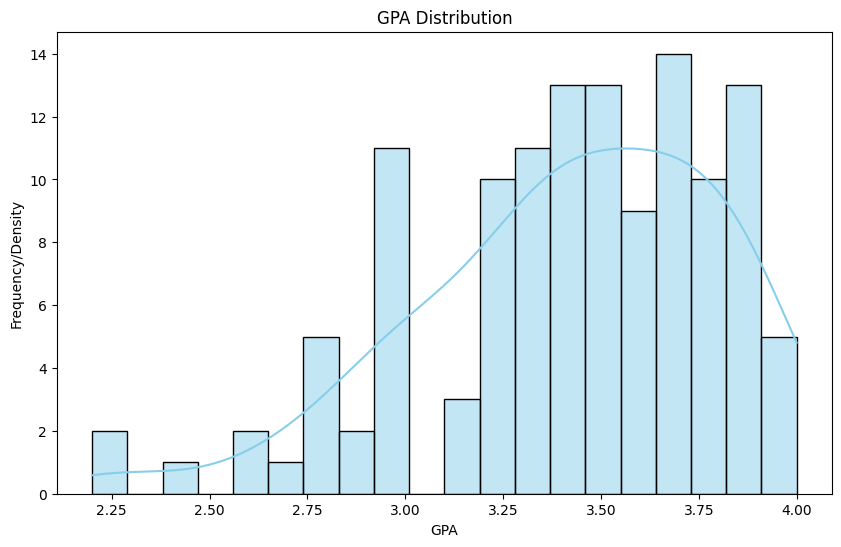

In [ ]:
plt.figure(figsize=(10, 6))

# Combined KDE and Histogram
sns.histplot(df['GPA'], bins=20, kde=True, color='skyblue')

plt.title('GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Frequency/Density')
plt.show()

This plot reveals the distribution of GPA scores of people who participated in the survey.

In [ ]:
# Assuming 'df' is your DataFrame and 'GENDER' is the column you want to visualize
gender_mapping = {1: 'Female', 2: 'Male'}
df['Gender'] = df['Gender'].map(gender_mapping)


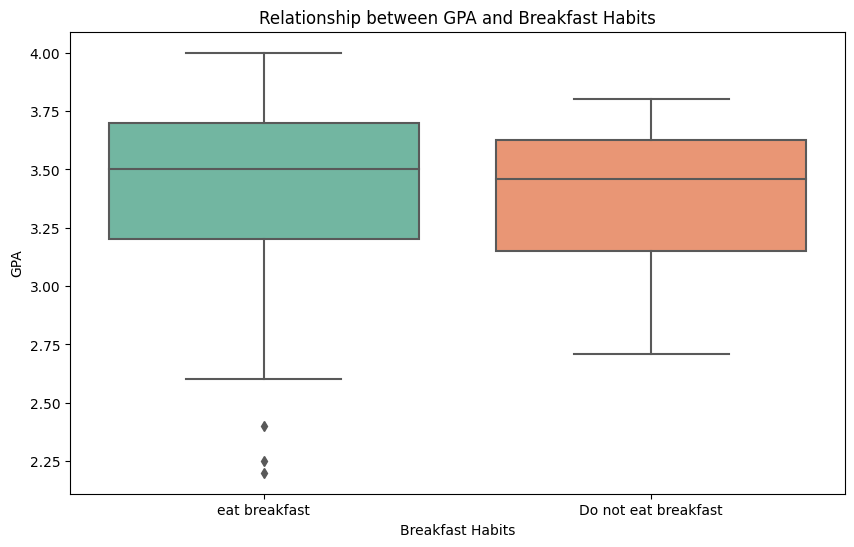

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='breakfast', y='GPA', data=df, palette='Set2')
plt.title('Relationship between GPA and Breakfast Habits')
plt.xlabel('Breakfast Habits')
plt.ylabel('GPA')
plt.xticks([0, 1], ['eat breakfast', 'Do not eat breakfast'])
plt.show()

This plot reveals that people having breakfast have better GPA score than the people not having breakfast, so we can assume that having timely and better healthy food does have a impact on academic and professional life of people.

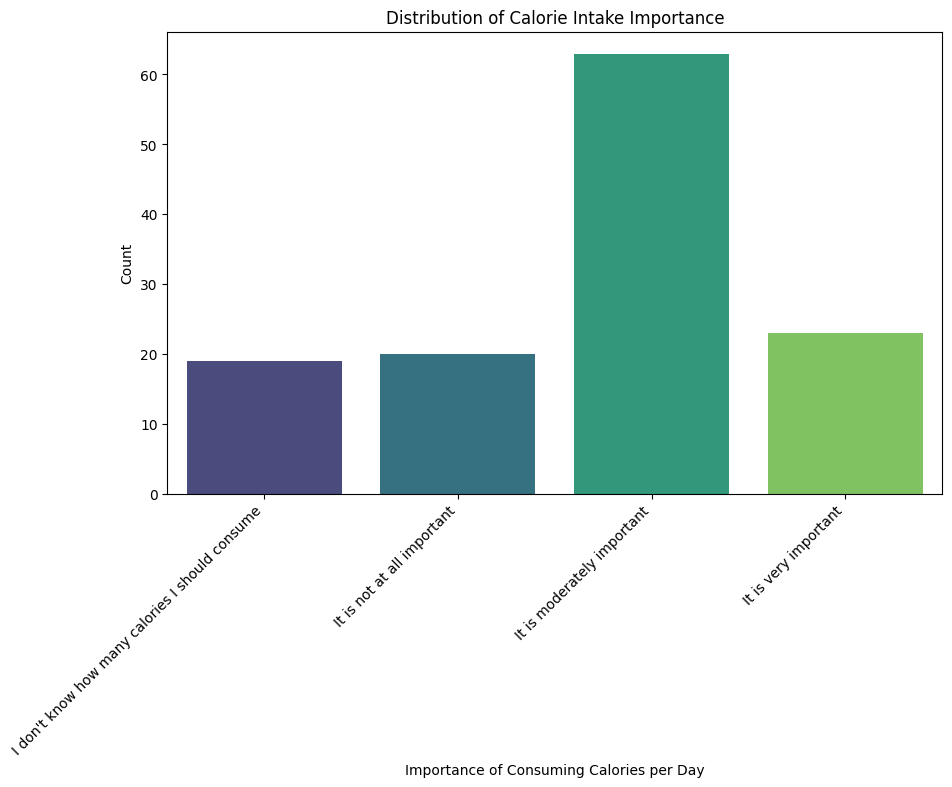

In [ ]:
# Assuming 'df' is your DataFrame and 'calories_day' is the column you want to visualize
response_labels = {
    1.0: "I don't know how many calories I should consume",
    2.0: "It is not at all important",
    3.0: "It is moderately important",
    4.0: "It is very important"
}

plt.figure(figsize=(10, 6))
sns.countplot(x='calories_day', data=df, palette='viridis')

plt.title('Distribution of Calorie Intake Importance')
plt.xlabel('Importance of Consuming Calories per Day')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2,3], labels=[response_labels[val] for val in [1,2,3,4]])  # Manually set ticks and labels
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

This graph shows that people are well familiar with the importance of calorie intake in their day to day life.

In [ ]:
df.diet_current_coded.unique()

array([1, 2, 3, 4])

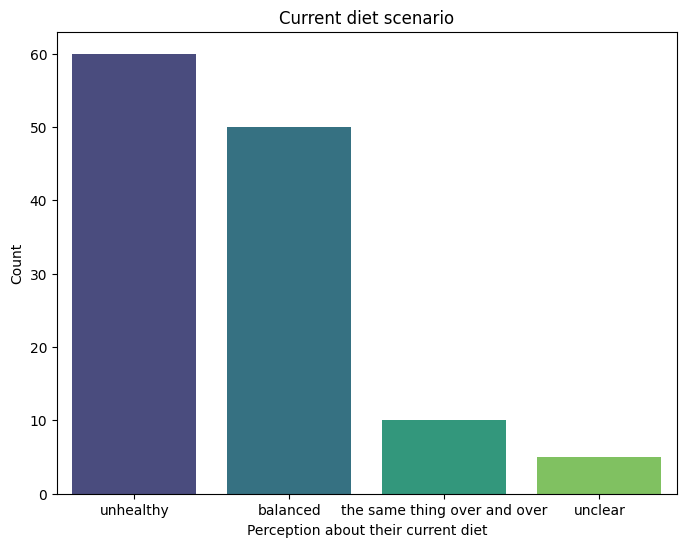

In [ ]:
counts = df['diet_current_coded'].value_counts()

# Define labels for each category
labels = {
    1: 'balanced',
    2: 'unhealthy',
    3: 'the same thing over and over',
    4: 'unclear'
}

# Map the labels to the index values in the 'eating_changes_counts' Series
counts.index = counts.index.map(labels)

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x= counts.index, y= counts.values, palette="viridis")

# Customize the plot
plt.title('Current diet scenario')
plt.xlabel('Perception about their current diet')
plt.ylabel('Count')

# Show the plot
plt.show()

This graph reveals that even though max. people about importance of healthy diet still they have unhealthy dietary conditions.

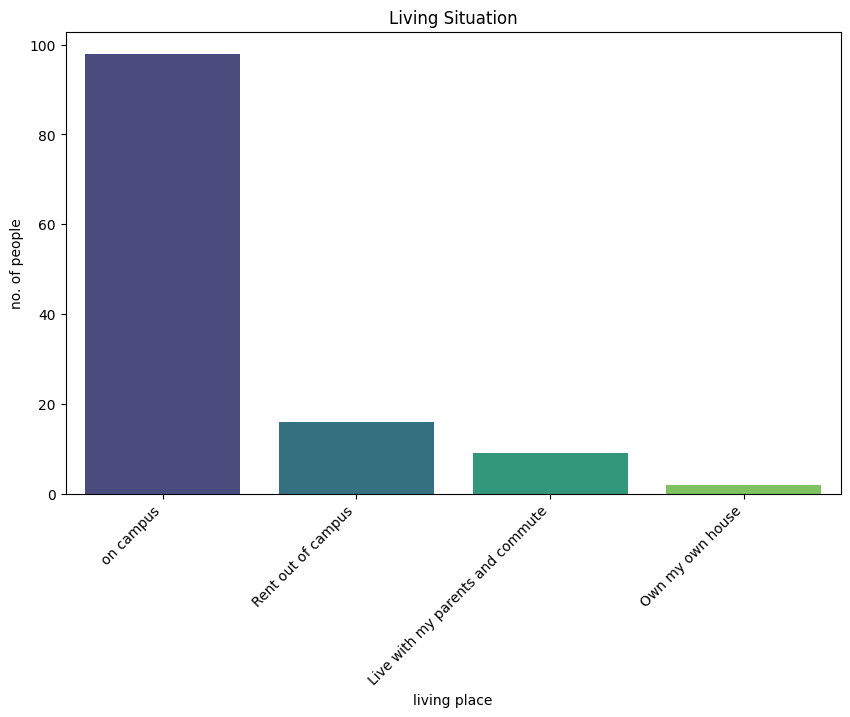

In [ ]:
order = df['on_off_campus'].value_counts().index

# Mapping for Employment Status labels
labels = {
    1: 'on campus',
    2: 'Rent out of campus',
    3: 'Live with my parents and commute',
    4: 'Own my own house'
}

# Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='on_off_campus', data=df, palette='viridis', order=order)
plt.title('Living Situation')
plt.xlabel('living place')
plt.ylabel('no. of people')
plt.xticks(ticks=range(4), labels=[labels[i] for i in order],rotation=45, ha='right')  # Set x-axis labels
plt.show()

As we can see here most of the students, live outside their houses, mostly in campus or in rental homes. Lets have a look at their perception about chnages in the eating habits they might encountered over time.

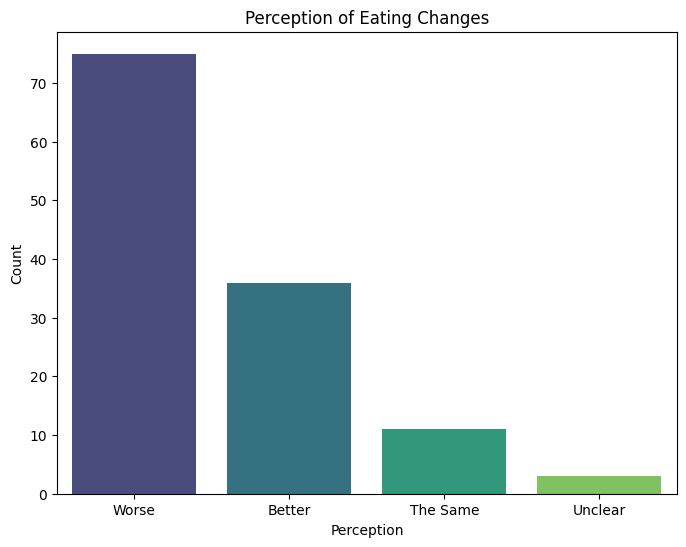

In [ ]:

# Count the occurrences of each category in 'eating_changes_coded1'
eating_changes_counts = df['eating_changes_coded'].value_counts()

# Define labels for each category
labels = {
    1: 'Worse',
    2: 'Better',
    3: 'The Same',
    4: 'Unclear'
}

# Map the labels to the index values in the 'eating_changes_counts' Series
eating_changes_counts.index = eating_changes_counts.index.map(labels)

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=eating_changes_counts.index, y=eating_changes_counts.values, palette="viridis")

# Customize the plot
plt.title('Perception of Eating Changes')
plt.xlabel('Perception')
plt.ylabel('Count')

# Show the plot
plt.show()

Most people have encountered worse changes in their dietary conditions and habits

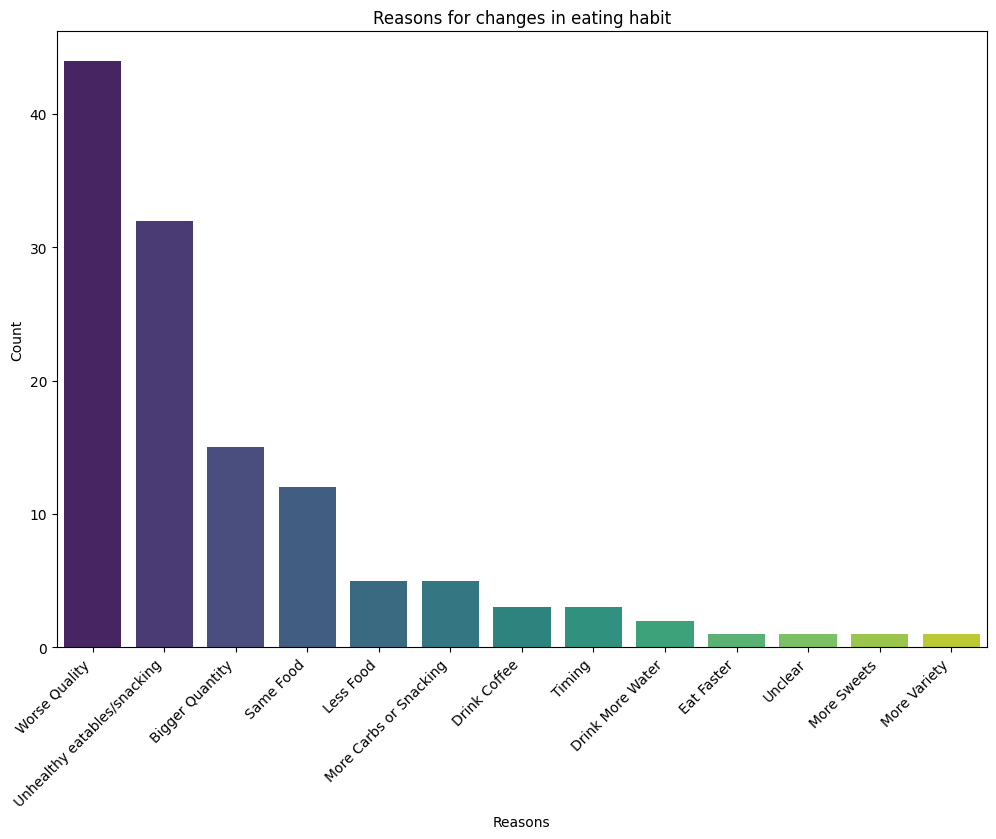

In [ ]:
reasons_counts = df['eating_changes_coded1'].value_counts()

# Define labels for each category
reasons_labels = {
    1: 'Eat Faster',
    2: 'Bigger Quantity',
    3: 'Worse Quality',
    4: 'Same Food',
    5: 'Unhealthy eatables/snacking',
    6: 'Unclear',
    7: 'Drink Coffee',
    8: 'Less Food',
    9: 'More Sweets',
    10: 'Timing',
    11: 'More Carbs or Snacking',
    12: 'Drink More Water',
    13: 'More Variety'
}

# Map the labels to the index values in the 'reasons_counts' Series
reasons_counts.index = reasons_counts.index.map(reasons_labels)

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=reasons_counts.index, y=reasons_counts.values, palette="viridis")

# Customize the plot
plt.title('Reasons for changes in eating habit')
plt.xlabel('Reasons')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

this plot here reveals the major reasons for the change in dietary conditions.

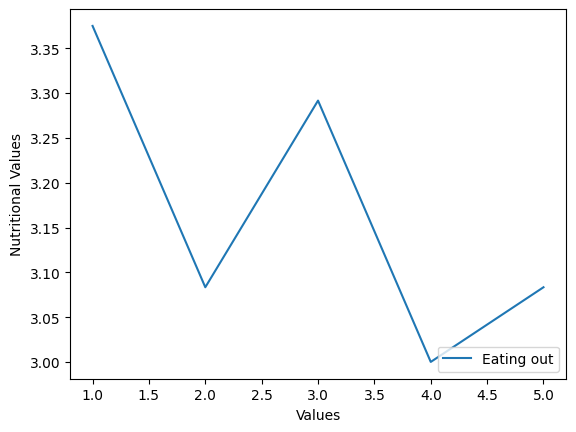

In [ ]:

sns.lineplot(data=df, x='eating_out', y='nutritional_check', label='Eating out',errorbar=None)

# Adding labels and title
plt.xlabel("Values")
plt.ylabel('Nutritional Values')


# Display the legend
plt.legend(loc = 'lower right')

# Show the plot
plt.show()

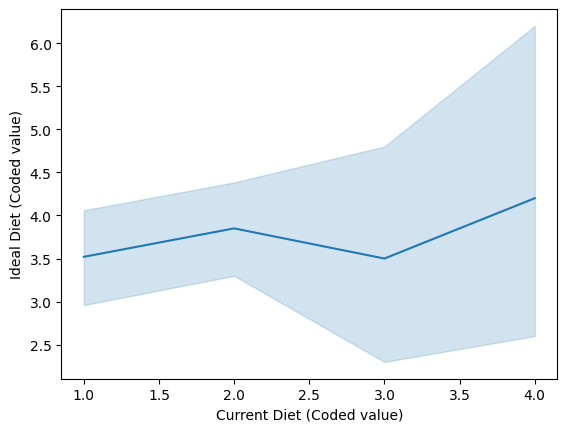

In [ ]:
sns.lineplot(data=df, x='diet_current_coded',y='ideal_diet_coded')
plt.xlabel('Current Diet (Coded value)')
plt.ylabel('Ideal Diet (Coded value)')
plt.show()

This graph reveals that due to several changes in eating habits of people, their current diet is very much deviated from the ideal diet as perceived by them. We can see the effect of these changes on the health of people as well.

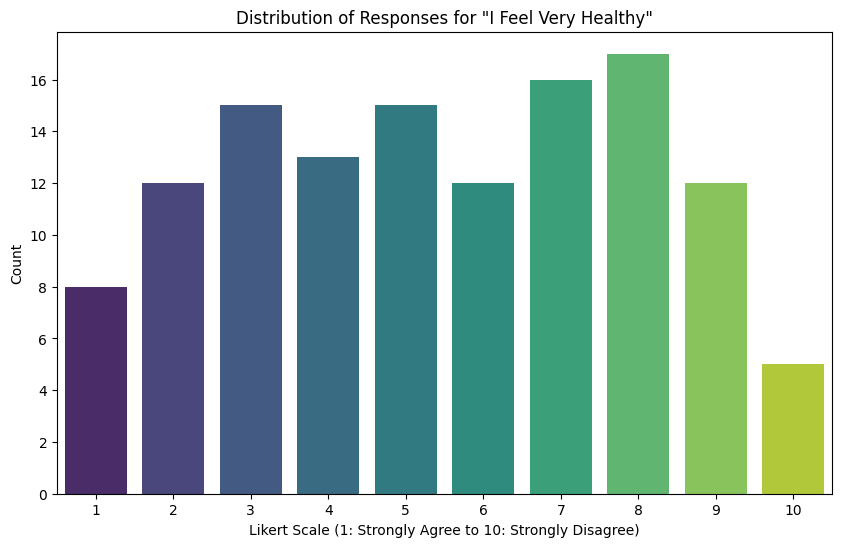

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='healthy_feeling', data=df, palette='viridis')
plt.title('Distribution of Responses for "I Feel Very Healthy"')
plt.xlabel('Likert Scale (1: Strongly Agree to 10: Strongly Disagree)')
plt.ylabel('Count')
plt.show()

Plot clearly shows that the most common responses for the healthy feeling were inclined towards unhealthy.

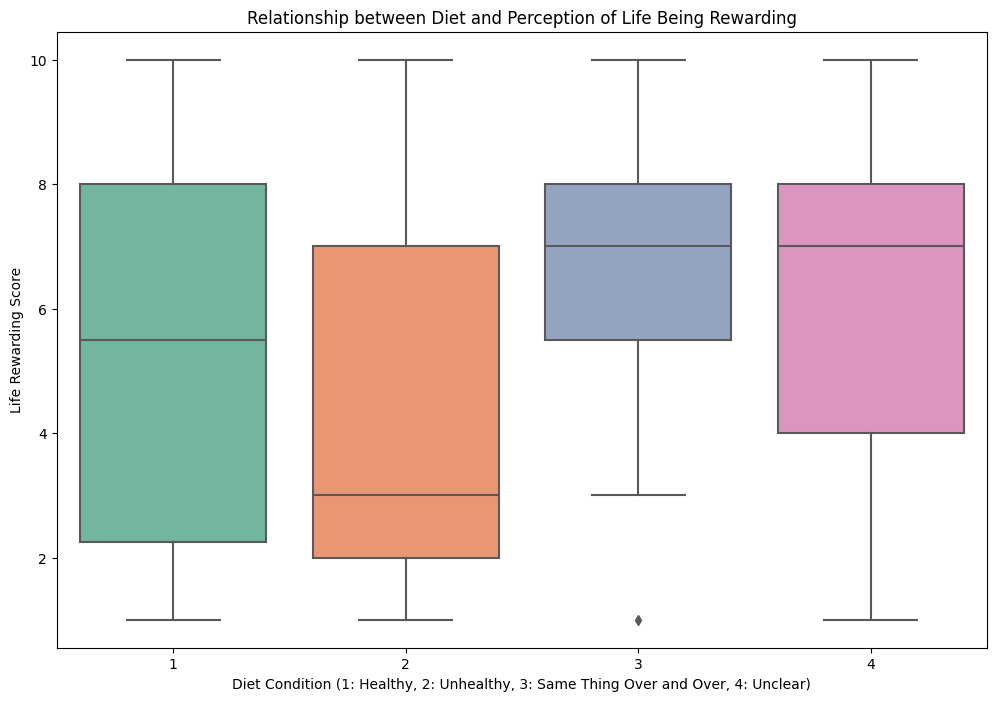

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='diet_current_coded', y='life_rewarding', data=df, palette='Set2')
plt.title('Relationship between Diet and Perception of Life Being Rewarding')
plt.xlabel('Diet Condition (1: Healthy, 2: Unhealthy, 3: Same Thing Over and Over, 4: Unclear)')
plt.ylabel('Life Rewarding Score')
plt.show()

We can clearly have a look at diet condition and people's perception about their life, so people having healthy diets are found to feel their life more worthy and rewarding than people with unhealthy diet.

<ipython-input-119-89c4fe325b17>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


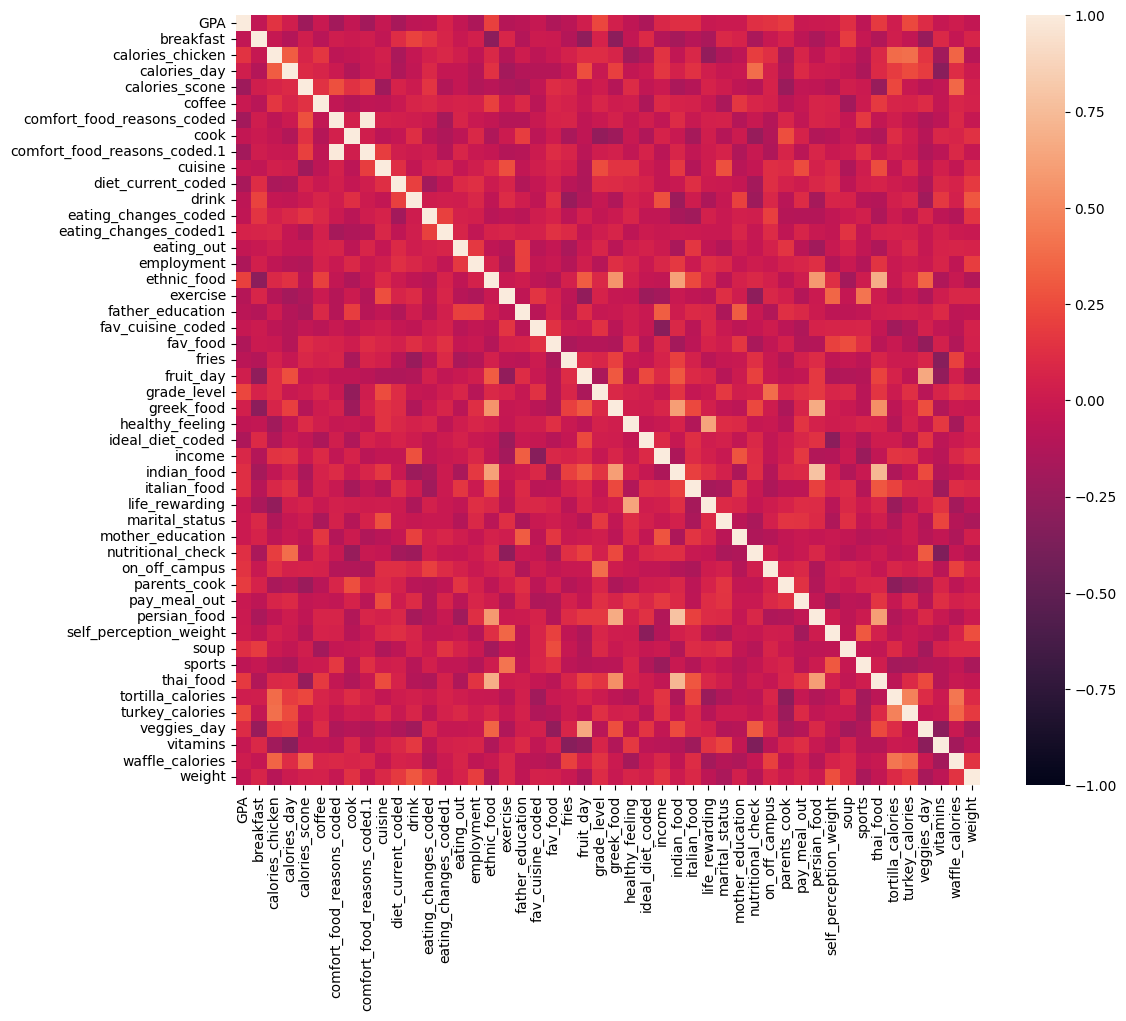

In [ ]:
correlation = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation, vmax = 1, vmin =-1)
plt.show()

The heat map shows the correlation between all columns. The whittish spots on the above heat map show that they are very much relatable.